#  Apartment Prices in Barcelona: Sant Andreu

Participants are encouraged to use the linear regression algorithm for prediction.

Here are the definitions for each of the variables:

num_rooms: This variable represents the number of bedrooms in an apartment.

num_baths: It refers to the number of bathrooms in an apartment, indicating the count of spaces equipped with facilities for personal hygiene, such as toilets, sinks, and showers or baths.

square_meters: This variable represents the total area or size of the apartment, measured in square meters. It provides an indication of the spatial extent or physical footprint of the property.

orientation: It refers to the cardinal or directional aspect of the apartment, specifying the compass direction it faces or the direction in which its windows are oriented.

year_built: This variable represents the year in which the apartment was constructed or built, providing an indication of its age and potential implications for its condition, architectural style, and infrastructure.

door: It refers to the specific door number or identifier associated with the apartment within a building or complex. It distinguishes one apartment from another within the same property.

is_furnished: This variable indicates whether the apartment is offered or equipped with furniture. It helps determine whether the tenant or buyer will have access to pre-existing furnishings or whether they need to provide their own.

has_pool: It denotes whether the apartment has a swimming pool as part of its amenities or shared facilities. This feature adds a recreational element and can influence the desirability and value of the property.

neighborhood: This variable represents the specific neighborhood or locality in which the apartment is situated within Barcelona. It provides geographical context and helps capture the characteristics and amenities associated with that area.

num_crimes: It refers to the count or frequency of reported crimes that have occurred in the vicinity of the apartment's location or neighborhood. It serves as an indicator of safety and security within the area.

has_ac: This variable indicates whether the apartment is equipped with an air conditioning system, offering cooling or heating capabilities to maintain a comfortable indoor temperature.

accepts_pets: It denotes whether the apartment allows or accepts pets as tenants or residents. This variable is essential for individuals with pets who are seeking suitable accommodations.

num_supermarkets: This variable represents the count or availability of supermarkets in close proximity to the apartment. It reflects the ease of access to grocery shopping facilities in the neighborhood.

price: It represents the price of the apartment, typically measured in a specific currency (e.g., Euros). It is the dependent variable in the prediction task and serves as the target value to be estimated or predicted using the other variables.

In [2]:
import pandas as pd
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
data = pd.read_csv('train_apartment_prices_barcelona.csv')
data

,id,num_rooms,num_baths,square_meters,orientation,year_built,door,is_furnished,has_pool,neighborhood,num_crimes,has_ac,accepts_pets,num_supermarkets,price
0,9255,1.0,1.0,NaN,NaN,1956.0,3º - 1a,False,False,Sant Martí,2.0,True,True,NaN,1096
1,1562,4.0,1.0,133.0,west,1960.0,7º - 2a,False,False,Sants,4.0,False,False,2.0,1396
2,1671,2.0,3.0,137.0,NaN,2000.0,1º - 1a,False,True,Eixample,0.0,False,False,NaN,1263
3,6088,1.0,2.0,-41.0,NaN,2002.0,6º - 1a,False,True,Sants,5.0,False,False,NaN,1290
4,6670,2.0,1.0,70.0,NaN,1979.0,5º - 1a,True,False,Gràcia,0.0,False,True,3.0,962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,5735,2.0,NaN,95.0,south,2021.0,9º - 1a,False,False,Sant Martí,0.0,False,False,NaN,1066
7996,5192,4.0,3.0,166.0,NaN,1995.0,9º - 4a,False,False,Nou Barris,9.0,False,False,NaN,1255
7997,5391,4.0,1.0,89.0,east,2015.0,9º - 3a,True,False,Sant Martí,0.0,True,False,1.0,1220
7998,861,4.0,2.0,167.0,west,1977.0,8º - 4a,False,True,Gràcia,0.0,True,False,NaN,1547


In [ ]:
test_data = pd.read_csv('test_apartment_prices_barcelona.csv')
test_data

#test data doesn't contain price variable

,id,num_rooms,num_baths,square_meters,orientation,year_built,door,is_furnished,has_pool,neighborhood,num_crimes,has_ac,accepts_pets,num_supermarkets
0,6253,NaN,1.0,152.0,NaN,2012.0,5º - 4a,True,True,Les Cors,0.0,False,False,NaN
1,4685,NaN,2.0,90.0,east,1957.0,10º - 1a,True,False,Ciutat Vella,2.0,False,True,3.0
2,1732,NaN,2.0,86.0,NaN,1991.0,5º - 2a,False,False,Eixample,0.0,False,True,NaN
3,4743,NaN,3.0,164.0,NaN,2002.0,8º - 4a,False,True,Nou Barris,7.0,False,False,NaN
4,4522,NaN,1.0,99.0,NaN,1984.0,8º - 4a,True,True,Sant Andreu,0.0,True,False,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,6413,3.0,3.0,95.0,south,1976.0,5º - 2a,True,True,Sarrià-Sant Gervasi,0.0,True,True,NaN
1996,8286,1.0,2.0,161.0,NaN,1984.0,5º - 1a,True,False,Nou Barris,9.0,False,False,NaN
1997,7854,4.0,3.0,111.0,NaN,1957.0,4º - 2a,True,True,Gràcia,0.0,False,True,NaN
1998,1096,2.0,1.0,154.0,north,2018.0,9º - 1a,False,False,Nou Barris,7.0,False,False,NaN


In [ ]:
data.dtypes


id                    int64
num_rooms           float64
num_baths           float64
square_meters       float64
orientation          object
year_built          float64
door                 object
is_furnished         object
has_pool             object
neighborhood         object
num_crimes          float64
has_ac               object
accepts_pets         object
num_supermarkets    float64
price                 int64
dtype: object

In [ ]:
# num_supermarkets are missing 6589 of 8000 so we should drop it
# orientation missing 1/4 of the values so we should consider it to drop it
data.isna().sum()

id                     0
num_rooms              0
num_baths            160
square_meters        155
orientation         2341
year_built           170
door                 149
is_furnished         165
has_pool             156
neighborhood         165
num_crimes           160
has_ac               169
accepts_pets         155
num_supermarkets    6589
price                  0
dtype: int64

# Just to practice code, I dropped all the columns that have NA values


In [ ]:
# Drop Supermarket and Orientation columns and put NaN in extreme values of sqr_mts and rooms
# drop door aswell as seems not usable at all
cleaned_data = data.drop(columns=['num_supermarkets','orientation', 'door'])
cleaned_data['square_meters'] = np.where(cleaned_data['square_meters']<0, np.NaN, cleaned_data['square_meters'])
cleaned_data['num_rooms'] = np.where(cleaned_data['num_rooms']>6, np.NaN, cleaned_data['num_rooms'])
#cleaned_data = cleaned_data.dropna(subset=['num_rooms', 'num_baths', 'square_meters', 'year_built', 'is_furnished', 'has_pool', 'has_ac', 'accepts_pets',
    #'neighborhood', 'num_crimes', 'price'])

cleaned_test = test_data.drop(columns=['num_supermarkets','orientation', 'door'])
cleaned_test['square_meters'] = np.where(cleaned_test['square_meters']<0, np.NaN, cleaned_test['square_meters'])
cleaned_test['num_rooms'] = np.where(cleaned_test['num_rooms']>6, np.NaN, cleaned_test['num_rooms'])



In [ ]:
cleaned_data.isna().sum()

id                 0
num_rooms         46
num_baths        160
square_meters    236
year_built       170
is_furnished     165
has_pool         156
neighborhood     165
num_crimes       160
has_ac           169
accepts_pets     155
price              0
dtype: int64

In [ ]:
cleaned_test.isna().sum()

id                 0
num_rooms        245
num_baths         40
square_meters     62
year_built        30
is_furnished      35
has_pool          44
neighborhood      35
num_crimes        40
has_ac            31
accepts_pets      45
dtype: int64

In [ ]:
cleaned_data.describe()

,id,num_rooms,num_baths,square_meters,year_built,num_crimes,price
count,8000.000000,7954.000000,7840.000000,7764.000000,7830.000000,7840.000000,8000.000000
mean,5012.506875,2.489565,1.988265,109.727975,1985.321073,2.803444,1099.616250
std,2887.649416,1.121536,0.815943,34.983361,20.591437,3.447714,271.686617
min,2.000000,1.000000,1.000000,50.000000,1950.000000,0.000000,195.000000
25%,2512.750000,1.000000,1.000000,79.000000,1968.000000,0.000000,905.750000
50%,5014.500000,2.000000,2.000000,110.000000,1985.000000,1.000000,1104.000000
75%,7505.250000,3.000000,3.000000,140.000000,2003.000000,6.000000,1295.000000
max,10000.000000,4.000000,3.000000,170.000000,2021.000000,10.000000,2095.000000


# clean Nan values


In [ ]:
# KNN for number of rooms

from sklearn.impute import KNNImputer

# Initialize the KNN imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Apply KNN imputation on the 'num_rooms' column for both train and test datasets
cleaned_data['num_rooms'] = knn_imputer.fit_transform(cleaned_data[['num_rooms']])
cleaned_test['num_rooms'] = knn_imputer.transform(cleaned_test[['num_rooms']])

# Check the number of missing values in 'num_rooms' column after imputation
missing_num_rooms_after = {
    'Train Data': cleaned_data['num_rooms'].isnull().sum(),
    'Test Data': cleaned_test['num_rooms'].isnull().sum()
}

missing_num_rooms_after


{'Train Data': 0, 'Test Data': 0}

In [ ]:
# Apply KNN imputation on the 'num_baths' column
cleaned_data['num_baths'] = knn_imputer.fit_transform(cleaned_data[['num_baths']])
cleaned_test['num_baths'] = knn_imputer.transform(cleaned_test[['num_baths']])

# Mean imputation for 'square_meters'
cleaned_data['square_meters'].fillna(cleaned_data['square_meters'].mean(), inplace=True)
cleaned_test['square_meters'].fillna(cleaned_test['square_meters'].mean(), inplace=True)  # Use mean from train data

# Median imputation for 'year_built'
cleaned_data['year_built'].fillna(cleaned_data['year_built'].median(), inplace=True)
cleaned_test['year_built'].fillna(cleaned_test['year_built'].median(), inplace=True)  # Use median from train data

# Mode imputation for binary columns
binary_cols = ['is_furnished', 'has_pool', 'has_ac', 'accepts_pets']
for col in binary_cols:
    mode_val =  cleaned_data[col].mode()[0]
    cleaned_data[col].fillna(mode_val, inplace=True)
    cleaned_test[col].fillna(mode_val, inplace=True)

# Mode imputation for 'neighborhood'
mode_neighborhood = cleaned_data['neighborhood'].mode()[0]
cleaned_data['neighborhood'].fillna(mode_neighborhood, inplace=True)
cleaned_test['neighborhood'].fillna(mode_neighborhood, inplace=True)

# Median imputation for 'num_crimes'
cleaned_data['num_crimes'].fillna(cleaned_data['num_crimes'].median(), inplace=True)
cleaned_test['num_crimes'].fillna(cleaned_test['num_crimes'].median(), inplace=True)  # Use median from train data

# Check the number of missing values in the specified columns after imputation
missing_values_after = cleaned_data[['num_rooms', 'num_baths', 'square_meters', 'year_built', 'is_furnished', 'has_pool', 'neighborhood', 'num_crimes', 'has_ac', 'accepts_pets']].isnull().sum()
missing_values_after


num_rooms        0
num_baths        0
square_meters    0
year_built       0
is_furnished     0
has_pool         0
neighborhood     0
num_crimes       0
has_ac           0
accepts_pets     0
dtype: int64

In [ ]:
cleaned_test.isna().sum()

id               0
num_rooms        0
num_baths        0
square_meters    0
year_built       0
is_furnished     0
has_pool         0
neighborhood     0
num_crimes       0
has_ac           0
accepts_pets     0
dtype: int64

In [ ]:
cleaned_data.isna().sum()

id               0
num_rooms        0
num_baths        0
square_meters    0
year_built       0
is_furnished     0
has_pool         0
neighborhood     0
num_crimes       0
has_ac           0
accepts_pets     0
price            0
dtype: int64

In [ ]:
cleaned_data

,id,num_rooms,num_baths,square_meters,year_built,is_furnished,has_pool,neighborhood,num_crimes,has_ac,accepts_pets,price
0,9255,1.0,1.000000,109.727975,1956.0,False,False,Sant Martí,2.0,True,True,1096
1,1562,4.0,1.000000,133.000000,1960.0,False,False,Sants,4.0,False,False,1396
2,1671,2.0,3.000000,137.000000,2000.0,False,True,Eixample,0.0,False,False,1263
3,6088,1.0,2.000000,109.727975,2002.0,False,True,Sants,5.0,False,False,1290
4,6670,2.0,1.000000,70.000000,1979.0,True,False,Gràcia,0.0,False,True,962
...,...,...,...,...,...,...,...,...,...,...,...,...
7995,5735,2.0,1.988265,95.000000,2021.0,False,False,Sant Martí,0.0,False,False,1066
7996,5192,4.0,3.000000,166.000000,1995.0,False,False,Nou Barris,9.0,False,False,1255
7997,5391,4.0,1.000000,89.000000,2015.0,True,False,Sant Martí,0.0,True,False,1220
7998,861,4.0,2.000000,167.000000,1977.0,False,True,Gràcia,0.0,True,False,1547


# Transform "cleaned_data" columns to numerical values

In [ ]:
#transform furnished column into numerical values


# Import label encoder 
from sklearn import preprocessing 

# label_encoder object knows 
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'is_furnished'. 
cleaned_data['is_furnished']= label_encoder.fit_transform(cleaned_data['is_furnished']) 

cleaned_data['is_furnished'].unique() 




array([0, 1])

In [ ]:
mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print(mapping)


{False: 0, True: 1}


In [ ]:
#transform has_pool column into numerical values


# Import label encoder 
from sklearn import preprocessing 

# label_encoder object knows 
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'is_furnished'. 
cleaned_data['has_pool']= label_encoder.fit_transform(cleaned_data['has_pool']) 

cleaned_data['has_pool'].unique() 

array([0, 1])

In [ ]:
mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print(mapping)


{False: 0, True: 1}


In [ ]:
#transform neighborhood column into numerical values


# Import label encoder 
from sklearn import preprocessing 

# label_encoder object knows 
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'is_furnished'. 
cleaned_data['neighborhood']= label_encoder.fit_transform(cleaned_data['neighborhood']) 

cleaned_data['neighborhood'].unique() 



array([7, 8, 1, 2, 4, 9, 3, 6, 0, 5])

In [ ]:
mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print(mapping)


{'Ciutat Vella': 0, 'Eixample': 1, 'Gràcia': 2, 'Horta': 3, 'Les Cors': 4, 'Nou Barris': 5, 'Sant Andreu': 6, 'Sant Martí': 7, 'Sants': 8, 'Sarrià-Sant Gervasi': 9}


In [ ]:
#transform has_ac column into numerical values


# Import label encoder 
from sklearn import preprocessing 

# label_encoder object knows 
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'is_furnished'. 
cleaned_data['has_ac']= label_encoder.fit_transform(cleaned_data['has_ac']) 

cleaned_data['has_ac'].unique() 



array([1, 0])

In [ ]:
mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print(mapping)

{False: 0, True: 1}


In [ ]:
#transform accepts_pets column into numerical values


# Import label encoder 
from sklearn import preprocessing 

# label_encoder object knows 
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'is_furnished'. 
cleaned_data['accepts_pets']= label_encoder.fit_transform(cleaned_data['accepts_pets']) 

cleaned_data['accepts_pets'].unique() 



array([1, 0])

In [ ]:
mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print(mapping)

{False: 0, True: 1}


In [ ]:
cleaned_data

,id,num_rooms,num_baths,square_meters,year_built,is_furnished,has_pool,neighborhood,num_crimes,has_ac,accepts_pets,price
0,9255,1.0,1.000000,109.727975,1956.0,0,0,7,2.0,1,1,1096
1,1562,4.0,1.000000,133.000000,1960.0,0,0,8,4.0,0,0,1396
2,1671,2.0,3.000000,137.000000,2000.0,0,1,1,0.0,0,0,1263
3,6088,1.0,2.000000,109.727975,2002.0,0,1,8,5.0,0,0,1290
4,6670,2.0,1.000000,70.000000,1979.0,1,0,2,0.0,0,1,962
...,...,...,...,...,...,...,...,...,...,...,...,...
7995,5735,2.0,1.988265,95.000000,2021.0,0,0,7,0.0,0,0,1066
7996,5192,4.0,3.000000,166.000000,1995.0,0,0,5,9.0,0,0,1255
7997,5391,4.0,1.000000,89.000000,2015.0,1,0,7,0.0,1,0,1220
7998,861,4.0,2.000000,167.000000,1977.0,0,1,2,0.0,1,0,1547


In [ ]:
cleaned_data.isna().sum()

id               0
num_rooms        0
num_baths        0
square_meters    0
year_built       0
is_furnished     0
has_pool         0
neighborhood     0
num_crimes       0
has_ac           0
accepts_pets     0
price            0
dtype: int64

# Transform "cleaned_test" columns to numerical values

In [ ]:
cleaned_test

,id,num_rooms,num_baths,square_meters,year_built,is_furnished,has_pool,neighborhood,num_crimes,has_ac,accepts_pets
0,6253,2.489565,1.0,152.0,2012.0,True,True,Les Cors,0.0,False,False
1,4685,2.489565,2.0,90.0,1957.0,True,False,Ciutat Vella,2.0,False,True
2,1732,2.489565,2.0,86.0,1991.0,False,False,Eixample,0.0,False,True
3,4743,2.489565,3.0,164.0,2002.0,False,True,Nou Barris,7.0,False,False
4,4522,2.489565,1.0,99.0,1984.0,True,True,Sant Andreu,0.0,True,False
...,...,...,...,...,...,...,...,...,...,...,...
1995,6413,3.000000,3.0,95.0,1976.0,True,True,Sarrià-Sant Gervasi,0.0,True,True
1996,8286,1.000000,2.0,161.0,1984.0,True,False,Nou Barris,9.0,False,False
1997,7854,4.000000,3.0,111.0,1957.0,True,True,Gràcia,0.0,False,True
1998,1096,2.000000,1.0,154.0,2018.0,False,False,Nou Barris,7.0,False,False


In [ ]:
# List of columns to be imputed
#columns_to_impute = ["num_rooms", "num_baths", "square_meters", "year_built", "num_crimes"]

# For each column, replace missing values with its mode
#for column in columns_to_impute:
   # mode_value = cleaned_test[column].mode()[0]
    #cleaned_test[column].fillna(mode_value, inplace=True)

# Display the first few rows of the updated DataFrame to verify the changes
#cleaned_test.head()

In [ ]:
cleaned_test.isna().sum()

id               0
num_rooms        0
num_baths        0
square_meters    0
year_built       0
is_furnished     0
has_pool         0
neighborhood     0
num_crimes       0
has_ac           0
accepts_pets     0
dtype: int64

In [ ]:
#transform furnished column into numerical values


# Import label encoder 
from sklearn import preprocessing 

# label_encoder object knows 
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'is_furnished'. 
cleaned_test['is_furnished']= label_encoder.fit_transform(cleaned_test['is_furnished']) 

cleaned_test['is_furnished'].unique() 


array([1, 0])

In [ ]:
mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print(mapping)

{False: 0, True: 1}


In [ ]:
#transform has_pool column into numerical values


# Import label encoder 
from sklearn import preprocessing 

# label_encoder object knows 
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'is_furnished'. 
cleaned_test['has_pool']= label_encoder.fit_transform(cleaned_test['has_pool']) 

cleaned_test['has_pool'].unique() 

array([1, 0])

In [ ]:
mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print(mapping)


{False: 0, True: 1}


In [ ]:
#transform neighborhood column into numerical values


# Import label encoder 
from sklearn import preprocessing 

# label_encoder object knows 
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'is_furnished'. 
cleaned_test['neighborhood']= label_encoder.fit_transform(cleaned_test['neighborhood']) 

cleaned_test['neighborhood'].unique() 

array([4, 0, 1, 5, 6, 3, 8, 2, 7, 9])

In [ ]:
mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print(mapping)

{'Ciutat Vella': 0, 'Eixample': 1, 'Gràcia': 2, 'Horta': 3, 'Les Cors': 4, 'Nou Barris': 5, 'Sant Andreu': 6, 'Sant Martí': 7, 'Sants': 8, 'Sarrià-Sant Gervasi': 9}


In [ ]:
#transform has_ac column into numerical values


# Import label encoder 
from sklearn import preprocessing 

# label_encoder object knows 
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'is_furnished'. 
cleaned_test['has_ac']= label_encoder.fit_transform(cleaned_test['has_ac']) 

cleaned_test['has_ac'].unique() 

array([0, 1])

In [ ]:
mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print(mapping)

{False: 0, True: 1}


In [ ]:
#transform accepts_pets column into numerical values


# Import label encoder 
from sklearn import preprocessing 

# label_encoder object knows 
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'is_furnished'. 
cleaned_test['accepts_pets']= label_encoder.fit_transform(cleaned_test['accepts_pets']) 

cleaned_test['accepts_pets'].unique() 

array([0, 1])

In [ ]:
mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print(mapping)

{False: 0, True: 1}


In [ ]:
cleaned_test

,id,num_rooms,num_baths,square_meters,year_built,is_furnished,has_pool,neighborhood,num_crimes,has_ac,accepts_pets
0,6253,2.489565,1.0,152.0,2012.0,1,1,4,0.0,0,0
1,4685,2.489565,2.0,90.0,1957.0,1,0,0,2.0,0,1
2,1732,2.489565,2.0,86.0,1991.0,0,0,1,0.0,0,1
3,4743,2.489565,3.0,164.0,2002.0,0,1,5,7.0,0,0
4,4522,2.489565,1.0,99.0,1984.0,1,1,6,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,6413,3.000000,3.0,95.0,1976.0,1,1,9,0.0,1,1
1996,8286,1.000000,2.0,161.0,1984.0,1,0,5,9.0,0,0
1997,7854,4.000000,3.0,111.0,1957.0,1,1,2,0.0,0,1
1998,1096,2.000000,1.0,154.0,2018.0,0,0,5,7.0,0,0


# EDA CORRELATIONS

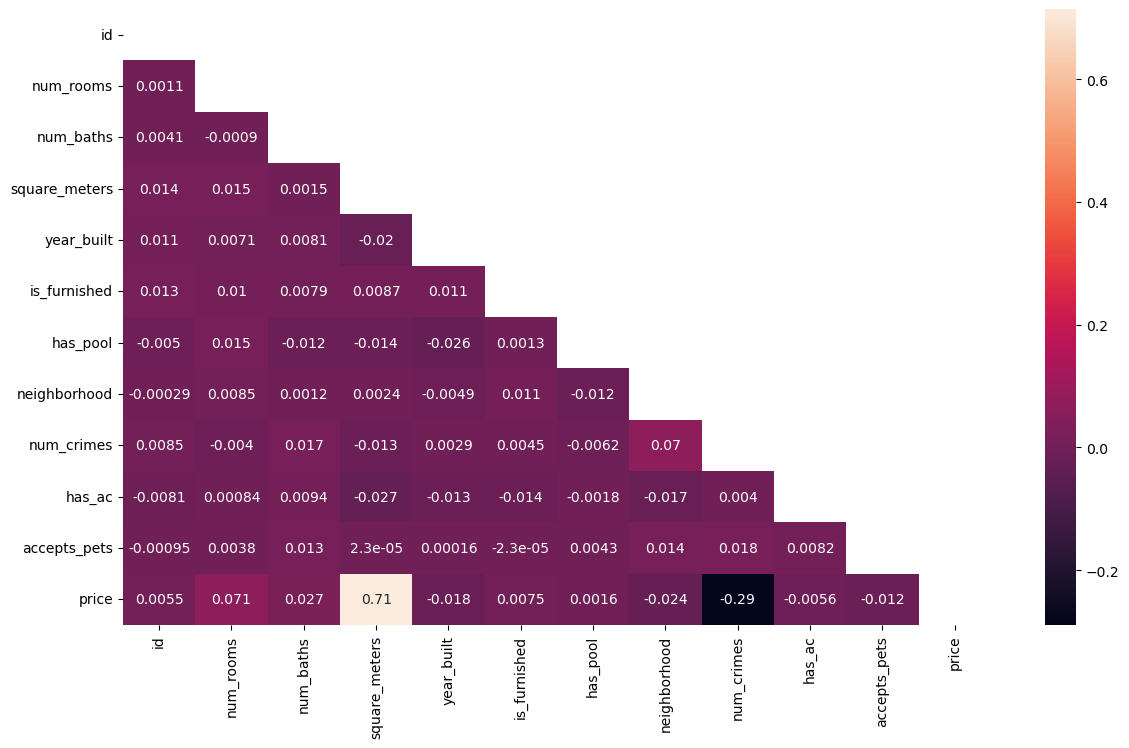

In [ ]:
# Importing our libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Let's calculate the correlations
cleaned_data_corr = cleaned_data.corr()

# Plot correlations
# Remove upper triangle
fig, ax = plt.subplots(figsize=(14,8))
mask = np.zeros_like(cleaned_data_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(cleaned_data_corr, mask = mask, annot = True)

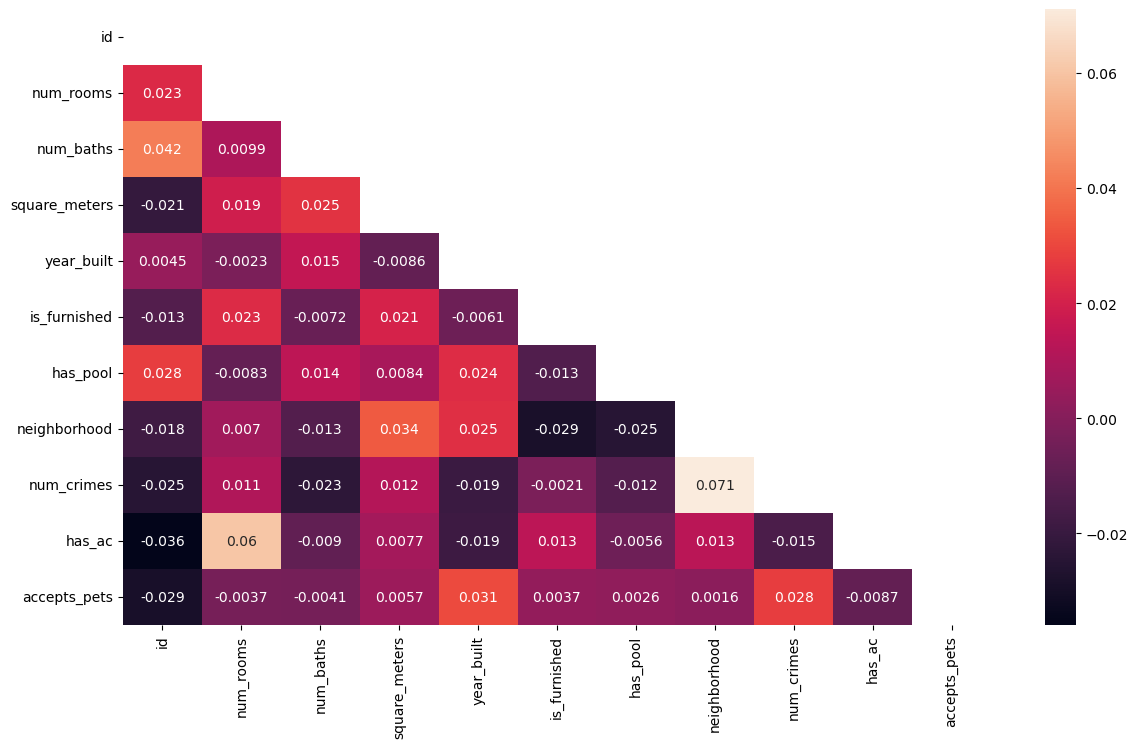

In [ ]:
# Importing our libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Let's calculate the correlations
cleaned_test_corr = cleaned_test.corr()

# Plot correlations
# Remove upper triangle
fig, ax = plt.subplots(figsize=(14,8))
mask = np.zeros_like(cleaned_test_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(cleaned_test_corr, mask = mask, annot = True)

# Testing the model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

#X_train = cleaned_data[['num_rooms', 'num_baths', 'square_meters', 'year_built', 'is_furnished', 'has_pool', 'has_ac', 'accepts_pets',
   # 'neighborhood', 'num_crimes']]
#X_test = cleaned_test[['num_rooms', 'num_baths', 'square_meters', 'year_built', 'is_furnished', 'has_pool', 'has_ac', 'accepts_pets',
    #'neighborhood', 'num_crimes']]

#y_train = cleaned_data['price']
#y_test = cleaned_test





In [ ]:
X_train = cleaned_data.drop(columns=['price'])
y_train = cleaned_data['price']
X_test = cleaned_test  # Assuming cleaned_test doesn't contain the 'price' column

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

train_predictions = lm.predict(X_train)
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(y_train, train_predictions)
print("Training MSE:", mse_train)

test_predictions = lm.predict(X_test)
print(test_predictions[:10])  # Displaying the first 10 predictions for test data


Training MSE: 29989.118818911626
[1387.97797284 1002.10339834 1021.61956366 1319.14123045 1099.18560338
  852.30689356  954.95086516 1220.77938932 1047.94044922 1224.69013176]


In [ ]:
# Assuming the LinearRegression model (lm) is already trained as shown earlier

# 1. Predict prices for the test dataset
predicted_prices = lm.predict(X_test)

# 2. Combine the "ID" column with predicted prices
results = pd.DataFrame({
    'id': cleaned_test['id'],
    'price': predicted_prices
})

# Display the first few rows of the results
print(results.head(10))

# 3. Optionally, save the results to a CSV file
results.to_csv('predicted_prices.csv', index=False)
results


     id        price
0  6253  1387.977973
1  4685  1002.103398
2  1732  1021.619564
3  4743  1319.141230
4  4522  1099.185603
5  6341   852.306894
6   577   954.950865
7  5203  1220.779389
8  6364  1047.940449
9   440  1224.690132


,id,price
0,6253,1387.977973
1,4685,1002.103398
2,1732,1021.619564
3,4743,1319.141230
4,4522,1099.185603
...,...,...
1995,6413,1098.790239
1996,8286,1222.290847
1997,7854,1199.544016
1998,1096,1230.433757


In [ ]:
from sklearn import metrics

# Your actual prices from the cleaned_data dataset
actual_prices = y_train

# Compute the metrics
mae = metrics.mean_absolute_error(actual_prices, train_predictions)
mse = metrics.mean_squared_error(actual_prices, train_predictions)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(actual_prices, train_predictions)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")


Mean Absolute Error (MAE): 138.00305749472057
Mean Squared Error (MSE): 29989.118818911626
Root Mean Squared Error (RMSE): 173.17366664395493
R-squared: 0.5936675539665037


# Test the code Ridge


In [ ]:
from sklearn.linear_model import RidgeCV
# Assuming cleaned_data and cleaned_test are already defined as before
X_train = cleaned_data.drop(columns=['price'])
y_train = cleaned_data['price']
X_test = cleaned_test  # Assuming cleaned_test doesn't contain the 'price' column

# Create and fit the LassoCV model
alphas = np.logspace(-4, 1, 100)  # List of alpha values to test
ridge_cv_model = RidgeCV(alphas=alphas, cv=10)  # cv parameter sets the number of cross-validation folds
ridge_cv_model.fit(X_train, y_train)

# Predict on the training data and calculate MSE
train_predictions_ridge_cv = ridge_cv_model.predict(X_train)
mse_train_ridge_cv = mean_squared_error(y_train, train_predictions_ridge_cv)
print("Training MSE with RidgeCV:", mse_train_ridge_cv)

# Predict on the test data using LassoCV
test_predictions_ridge_cv = ridge_cv_model.predict(X_test)

# Display the first 10 predictions for test data using LassoCV
test_display_ridge_cv = test_predictions_ridge_cv[:10]

# Create a DataFrame with the test set "id"s and the predicted "price"
results_ridge_cv = pd.DataFrame({
    'id': cleaned_test['id'],
    'price': test_predictions_ridge_cv
})

# Display the first few rows of the results and save to a CSV file
results_display_ridge_cv = results_ridge_cv.head(10)
results.to_csv('predicted_prices_ridge_cv.csv', index=False)
results_display_ridge_cv


Training MSE with RidgeCV: 29989.12004267509


,id,price
0,6253,1387.983505
1,4685,1002.143797
2,1732,1021.659923
3,4743,1319.128958
4,4522,1099.153467
5,6341,852.276138
6,577,954.908774
7,5203,1220.791602
8,6364,1048.012904
9,440,1224.707997


# Test the code LASSO

In [ ]:
from sklearn.linear_model import Lasso

X_train = cleaned_data[['num_rooms', 'num_baths', 'square_meters', 'year_built', 'is_furnished', 'has_pool', 'has_ac', 'accepts_pets',
    'neighborhood', 'num_crimes']]
X_test = cleaned_test[['num_rooms', 'num_baths', 'square_meters', 'year_built', 'is_furnished', 'has_pool', 'has_ac', 'accepts_pets',
    'neighborhood', 'num_crimes']]

y_train = cleaned_data['price']
y_test = cleaned_test



# Instantiate and train the Lasso regression model
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

# Predict on the training data to evaluate the model
y_train_pred_lasso = lasso_reg.predict(X_train)

# Calculate evaluation metrics for Lasso
mse_lasso = mean_squared_error(y_train, y_train_pred_lasso)
rmse_lasso = mean_squared_error(y_train, y_train_pred_lasso, squared=False)
mae_lasso = mean_absolute_error(y_train, y_train_pred_lasso)

mse_lasso, rmse_lasso, mae_lasso


(30004.302451492542, 173.21750041924903, 138.0568778427368)

In [ ]:
X_train = cleaned_data.drop(columns=['price'])
y_train = cleaned_data['price']
X_test = cleaned_test  # Assuming cleaned_test doesn't contain the 'price' column

from sklearn.linear_model import Lasso
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

train_predictions_lasso = lasso_model.predict(X_train)
mse_train_lasso = mean_squared_error(y_train, train_predictions_lasso)
print("Training MSE with Lasso:", mse_train_lasso)

# Predict on the test data
test_predictions_lasso = lasso_model.predict(X_test)
test_predictions_lasso[:10]  # Displaying the first 10 predictions for test data


Training MSE with Lasso: 30004.049353739098


array([1386.58493352, 1007.22472902, 1027.77878187, 1316.27504722,
       1094.09537895,  849.63764985,  950.63156205, 1220.48456186,
       1056.64676243, 1226.13876344])

In [ ]:
# Assuming the Lassomodel is already trained as shown earlier

# 1. Predict prices for the test dataset
predicted_prices_lasso = lasso_model.predict(X_test)

# 2. Combine the "ID" column with predicted prices
results = pd.DataFrame({
    'id': cleaned_test['id'],
    'price': predicted_prices
})

# Display the first few rows of the results
print(results.head(10))

# 3. Optionally, save the results to a CSV file
results.to_csv('predicted_prices_lasso.csv', index=False)

     id        price
0  6253  1387.977973
1  4685  1002.103398
2  1732  1021.619564
3  4743  1319.141230
4  4522  1099.185603
5  6341   852.306894
6   577   954.950865
7  5203  1220.779389
8  6364  1047.940449
9   440  1224.690132


In [ ]:
from sklearn.linear_model import LassoCV
# Assuming cleaned_data and cleaned_test are already defined as before
X_train = cleaned_data.drop(columns=['price'])
y_train = cleaned_data['price']
X_test = cleaned_test  # Assuming cleaned_test doesn't contain the 'price' column

# Create and fit the LassoCV model
alphas = np.logspace(-4, 1, 100)  # List of alpha values to test
lasso_cv_model = LassoCV(alphas=alphas, cv=10)  # cv parameter sets the number of cross-validation folds
lasso_cv_model.fit(X_train, y_train)

# Predict on the training data and calculate MSE
train_predictions_lasso_cv = lasso_cv_model.predict(X_train)
mse_train_lasso_cv = mean_squared_error(y_train, train_predictions_lasso_cv)
print("Training MSE with LassoCV:", mse_train_lasso_cv)

# Predict on the test data using LassoCV
test_predictions_lasso_cv = lasso_cv_model.predict(X_test)

# Display the first 10 predictions for test data using LassoCV
test_display_lasso_cv = test_predictions_lasso_cv[:10]

# Create a DataFrame with the test set "id"s and the predicted "price"
results_lasso_cv = pd.DataFrame({
    'id': cleaned_test['id'],
    'price': test_predictions_lasso_cv
})

# Display the first few rows of the results and save to a CSV file
results_display_lasso_cv = results_lasso_cv.head(10)

results.to_csv('predicted_prices_lasso_cv.csv', index=False)

results_display_lasso_cv


Training MSE with LassoCV: 29990.213844031274


,id,price
0,6253,1387.275241
1,4685,1002.957348
2,1732,1023.439408
3,4743,1318.801934
4,4522,1097.568317
5,6341,851.999097
6,577,953.512633
7,5203,1221.043914
8,6364,1050.389016
9,440,1224.647139
